In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data


Loading CLient Data and Proce Data in two differnt Data frame.

In [2]:
client_df=pd.read_csv(r'C:\Users\Abhyuday\Desktop\BCG\client_data.csv')
price_df=pd.read_csv(r'C:\Users\Abhyuday\Desktop\BCG\price_data.csv')

In [3]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


## Statistics fo Data

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


# Data Visualization

In [9]:
def plot_stacked_bars(dataframe,title_,size_=(15,10),rot_=0,legend_="upper_right"):
    ax=dataframe.plot(kind="bar",
                     stacked=True,
                     figsize=size_,
                     rot=rot_,
                     title=title_
                     )
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["retention","churn"],loc=legend_)
    plt.ylabel("company base (%)")
    
    plt.show()

def annotate_stacked_bars(ax,pad=0.99,colour="white",textsize=14):
    for p in ax.containers:
        #value = str(round(p.get_height(),1))
        #if value =='0.0':
         #   continue
        ax.bar_label(p,fmt='%0.00f',label_type='center')
        #ax.annotate(value,((p.get_x()+p.get_width()/2)*pad-0.5,(p.get_y()+p.get_height()/2)*pad),color=colour,size=textsize)

Churn

In [10]:
churn=client_df[['id','churn']]
churn.columns=['Companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_percentage= churn_total /churn_total.sum()*100

churn_percentage

,Companies
churn,
0,90.284814
1,9.715186


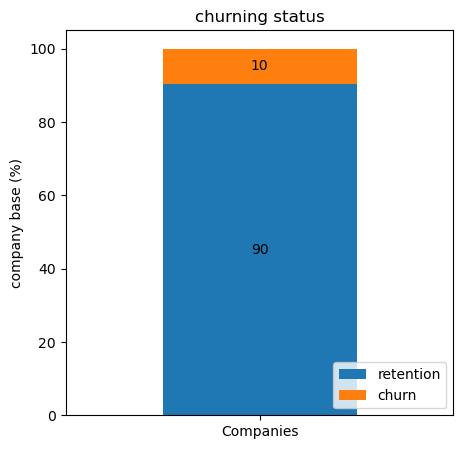

In [11]:
plot_stacked_bars(churn_percentage.transpose(),"churning status",(5,5),legend_="lower right")

Consumption

In [12]:
consumption=client_df[['id','cons_12m','cons_gas_12m','cons_last_month','imp_cons','has_gas','churn']]

In [14]:
def plot_distribution(dataframe,column,ax,bins_=50):
    temp=pd.DataFrame({"Retention":dataframe[dataframe['churn']==0][column],
                    "Churn":dataframe[dataframe["churn"]==1][column]})
    #ploting Histogram
    temp[["Retention","Churn"]].plot(kind='hist',bins=bins_,ax=ax,stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain',axis='x')

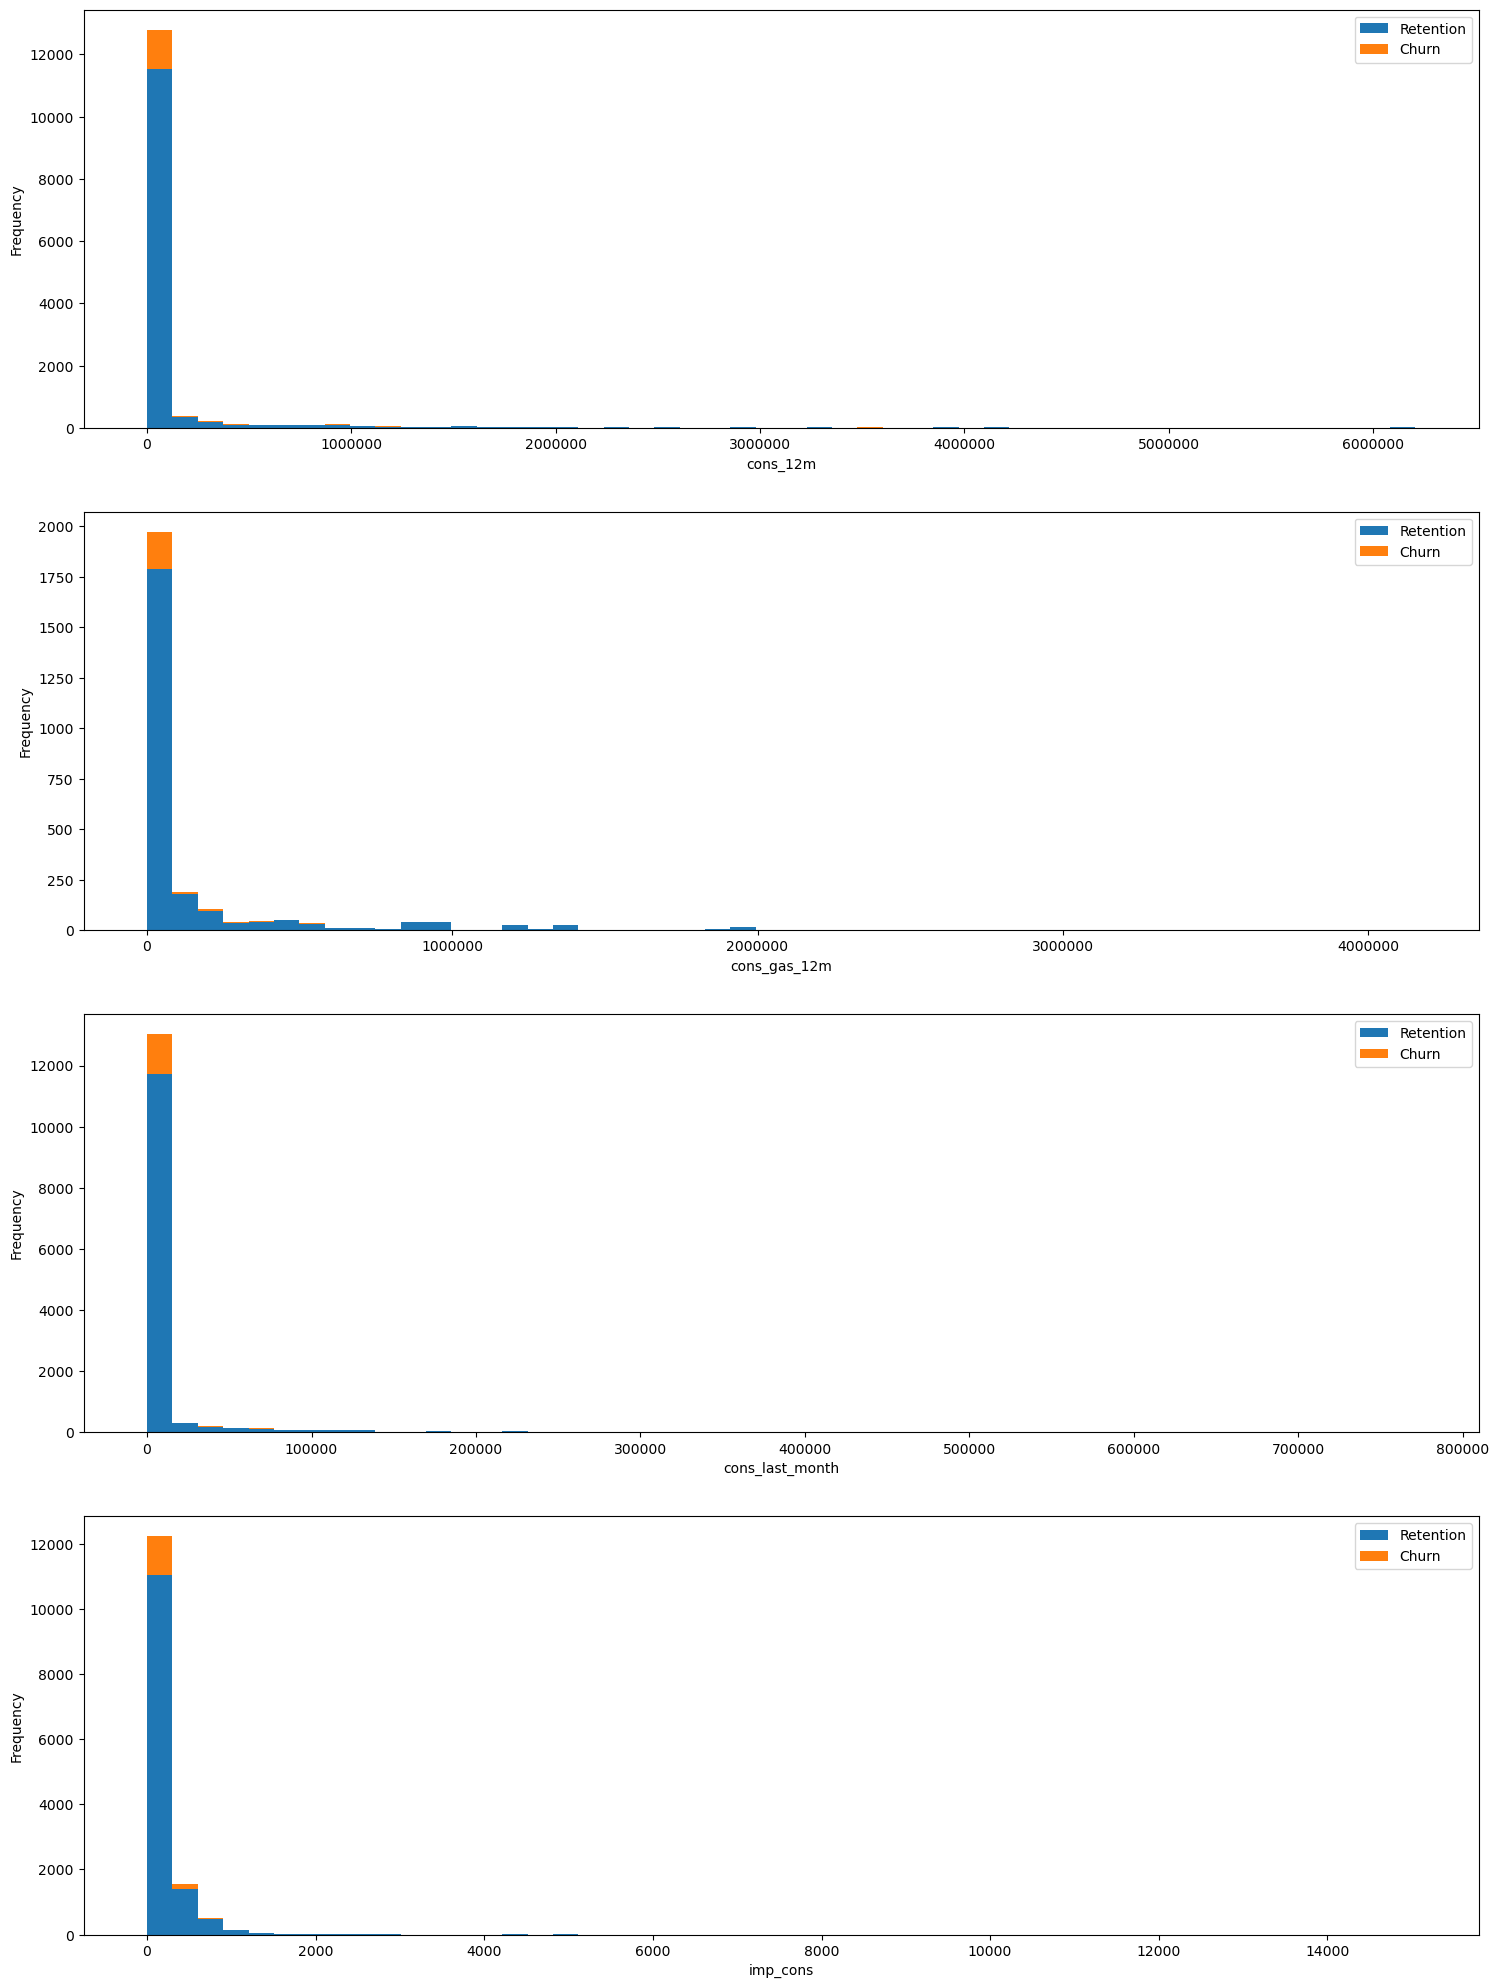

In [16]:
fig, axs=plt.subplots(nrows=4,figsize=(18,25))
plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption[consumption['has_gas']=='t'],'cons_gas_12m',axs[1])
plot_distribution(consumption,'cons_last_month',axs[2])
plot_distribution(consumption,'imp_cons',axs[3])

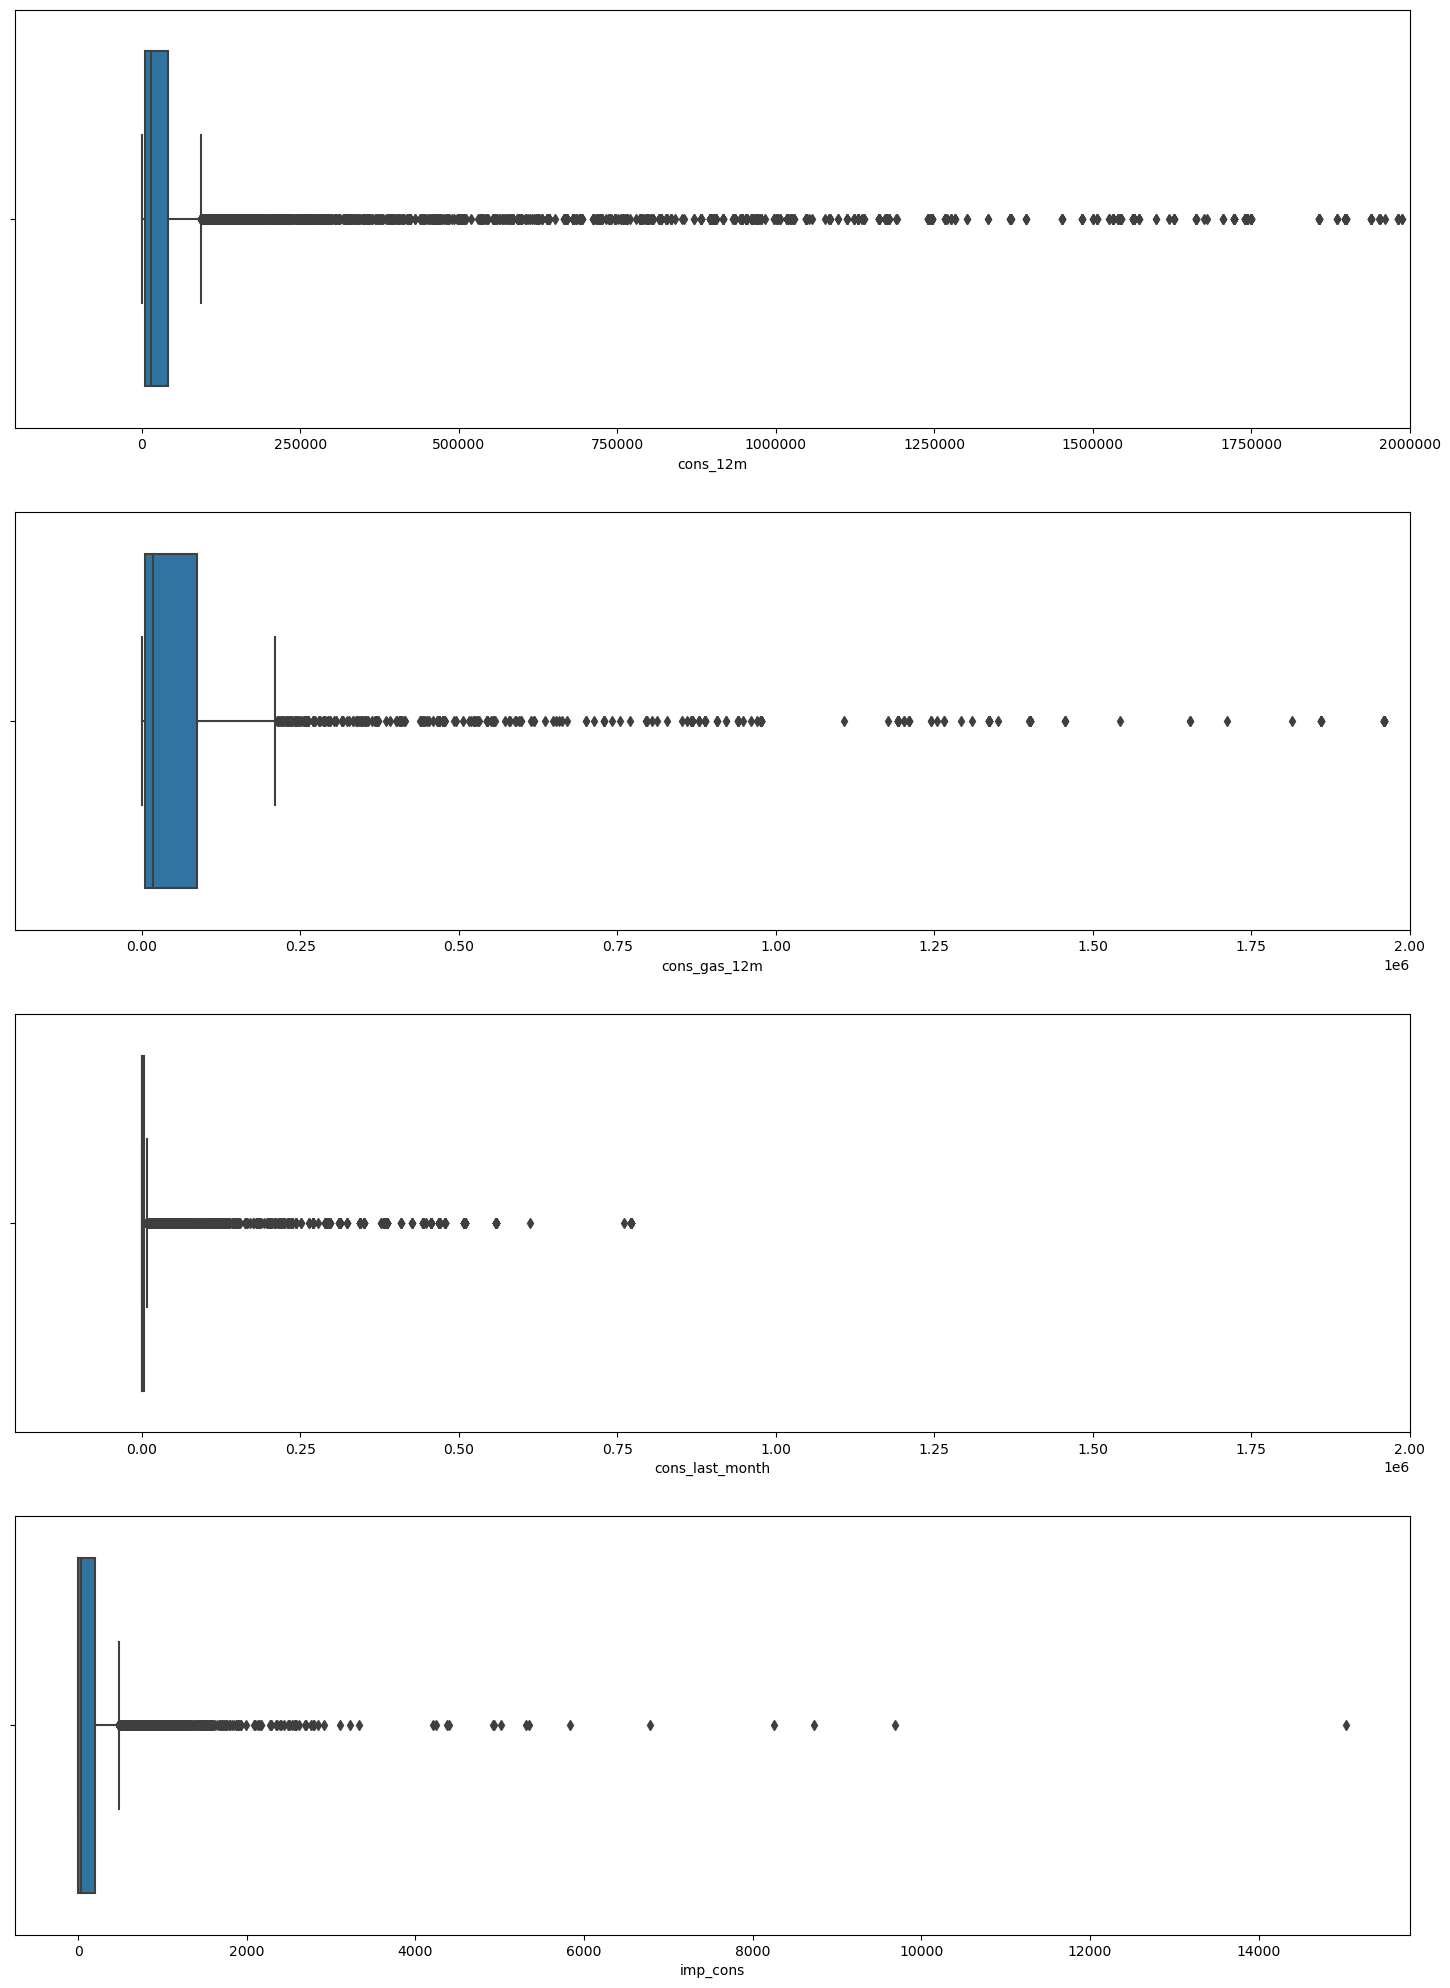

In [20]:
fis, axs=plt.subplots(nrows=4,figsize=(18,25))
sns.boxplot(consumption["cons_12m"],ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"]=='t']["cons_gas_12m"],ax=axs[1])
sns.boxplot(consumption["cons_last_month"],ax=axs[2])
sns.boxplot(consumption['imp_cons'],ax=axs[3])

for ax in axs:
    ax.ticklabel_format(style="plain",axis='x')
    
    axs[0].set_xlim(-200000,2000000)
    axs[1].set_xlim(-200000,2000000)
    axs[2].set_xlim(-200000,2000000)
    plt.show()

Forcast

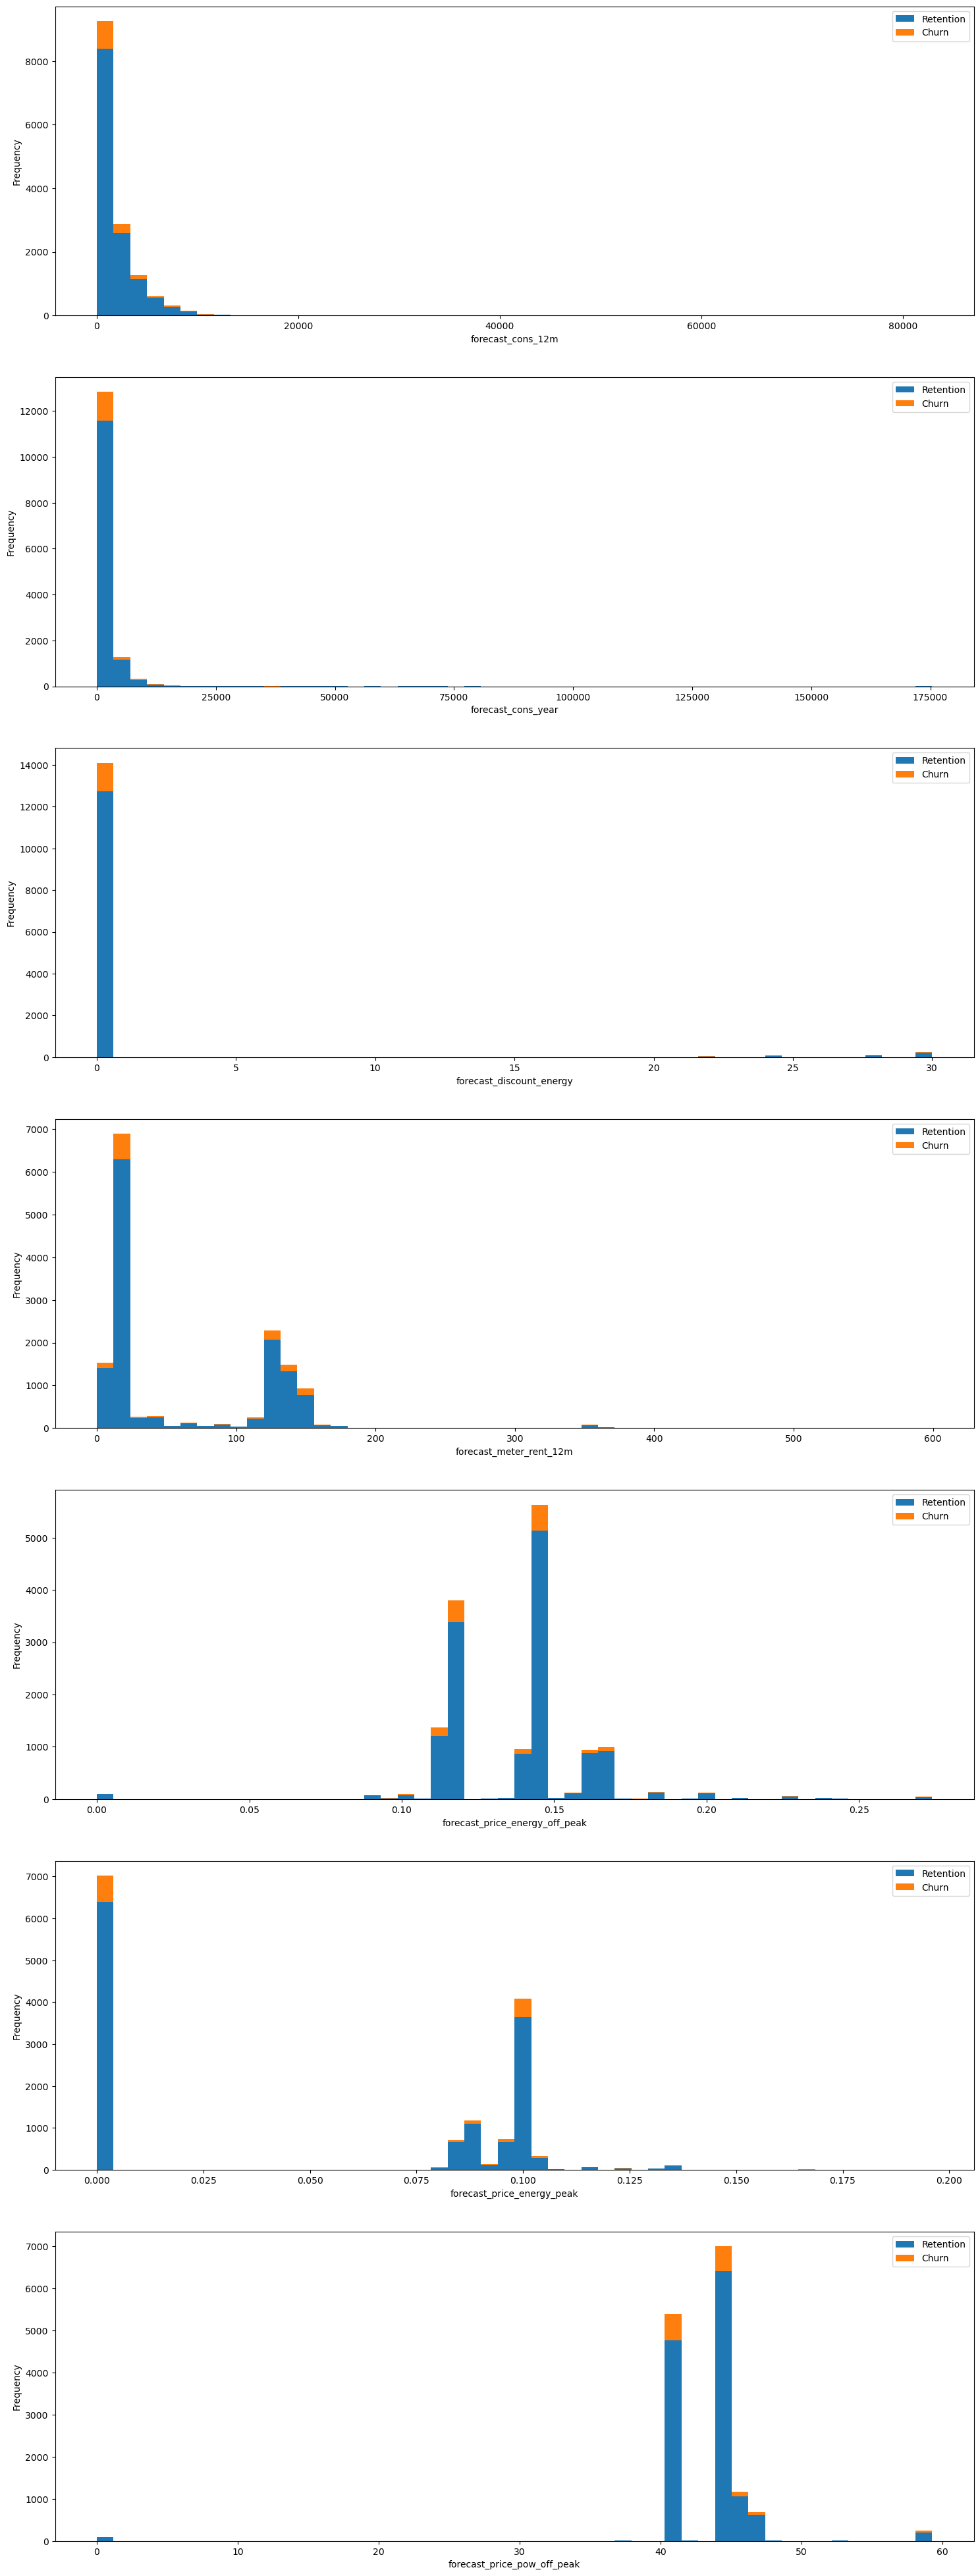

In [23]:
 forecast = client_df[
["id", "forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m", "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak","churn" ] ]


fig, axs = plt.subplots(nrows=7, figsize=(18,50))
# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

margins

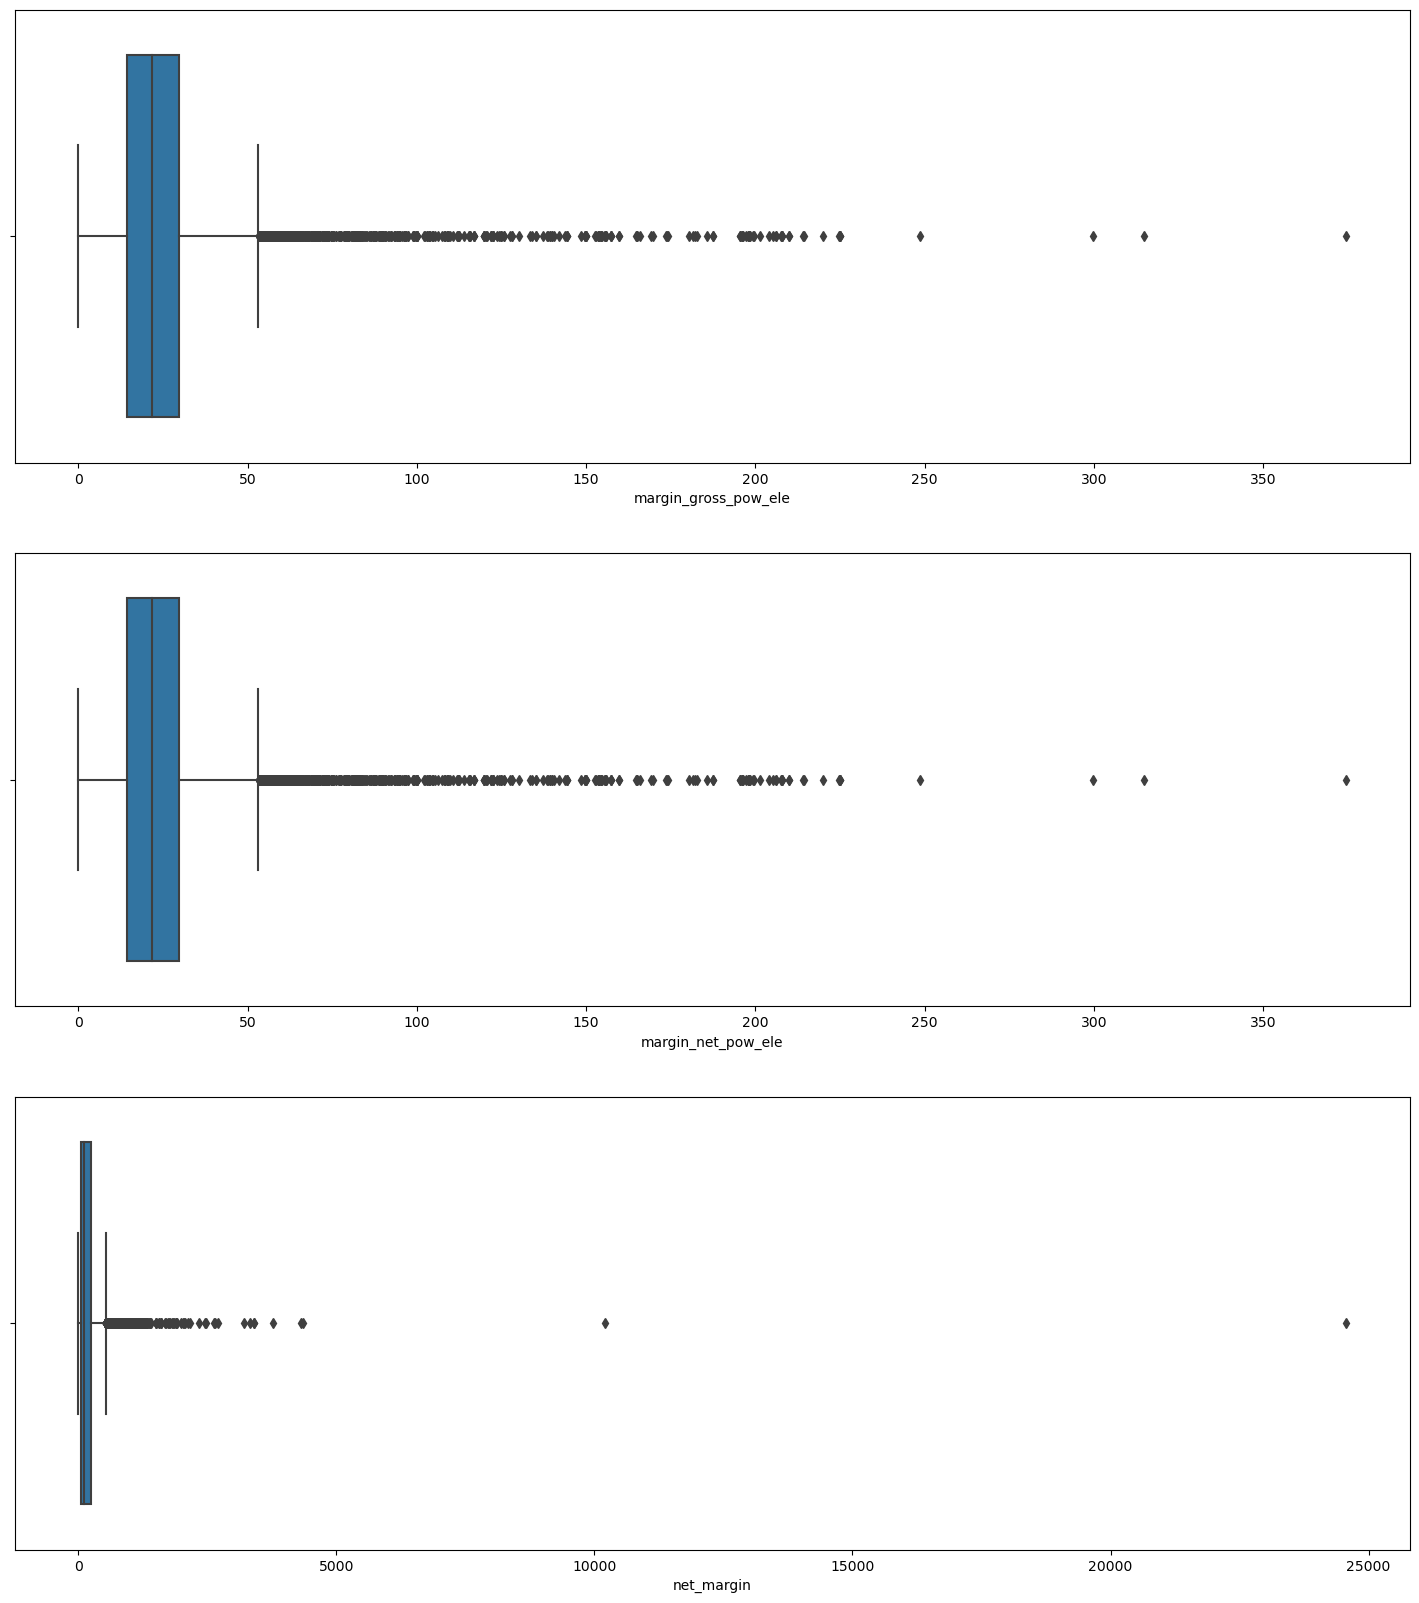

In [25]:
 margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin']]
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

In [29]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"],format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"],format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"],format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'],format='%Y-%m-%d')

# Create yearly sensitivity features
var_year = price_df.groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()

# Create last 6 months sensitivity features
var_6m = price_df[
price_df['price_date'] > '2015-06-01' ].groupby(['id', 'price_date']).mean().groupby(['id']).var().reset_index()
# Rename columns
var_year = var_year.rename(
columns={ "price_off_peak_var": "var_year_price_p1_var", "price_peak_var": "var_year_price_p2_var", "price_mid_peak_var": "var_year_price_p3_var", "price_off_peak_fix": "var_year_price_p1_fix", "price_peak_fix": "var_year_price_p2_fix", "price_mid_peak_fix": "var_year_price_p3_fix" } )
var_year["var_year_price_p1"] = var_year["var_year_price_p1_var"] +var_year["var_year_price_p1_fix"]
var_year["var_year_price_p2"] = var_year["var_year_price_p2_var"] +var_year["var_year_price_p2_fix"]
var_year["var_year_price_p3"] = var_year["var_year_price_p3_var"] +var_year["var_year_price_p3_fix"]
var_6m = var_6m.rename(
columns={ "price_off_peak_var": "var_6m_price_p1_var", "price_peak_var": "var_6m_price_p2_var", "price_mid_peak_var": "var_6m_price_p3_var", "price_off_peak_fix": "var_6m_price_p1_fix", "price_peak_fix": "var_6m_price_p2_fix", "price_mid_peak_fix": "var_6m_price_p3_fix" } )
var_6m["var_6m_price_p1"] = var_6m["var_6m_price_p1_var"] +var_6m["var_6m_price_p1_fix"]
var_6m["var_6m_price_p2"] = var_6m["var_6m_price_p2_var"] +var_6m["var_6m_price_p2_fix"]
var_6m["var_6m_price_p3"] = var_6m["var_6m_price_p3_var"] + var_6m["var_6m_price_p3_fix"]
# Merge into 1 dataframe
price_features = pd.merge(var_year, var_6m, on='id')

price_features.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00


In [30]:
price_analysis = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_analysis.head()

,id,var_year_price_p1_var,var_year_price_p2_var,var_year_price_p3_var,var_year_price_p1_fix,var_year_price_p2_fix,var_year_price_p3_fix,var_year_price_p1,var_year_price_p2,var_year_price_p3,var_6m_price_p1_var,var_6m_price_p2_var,var_6m_price_p3_var,var_6m_price_p1_fix,var_6m_price_p2_fix,var_6m_price_p3_fix,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0


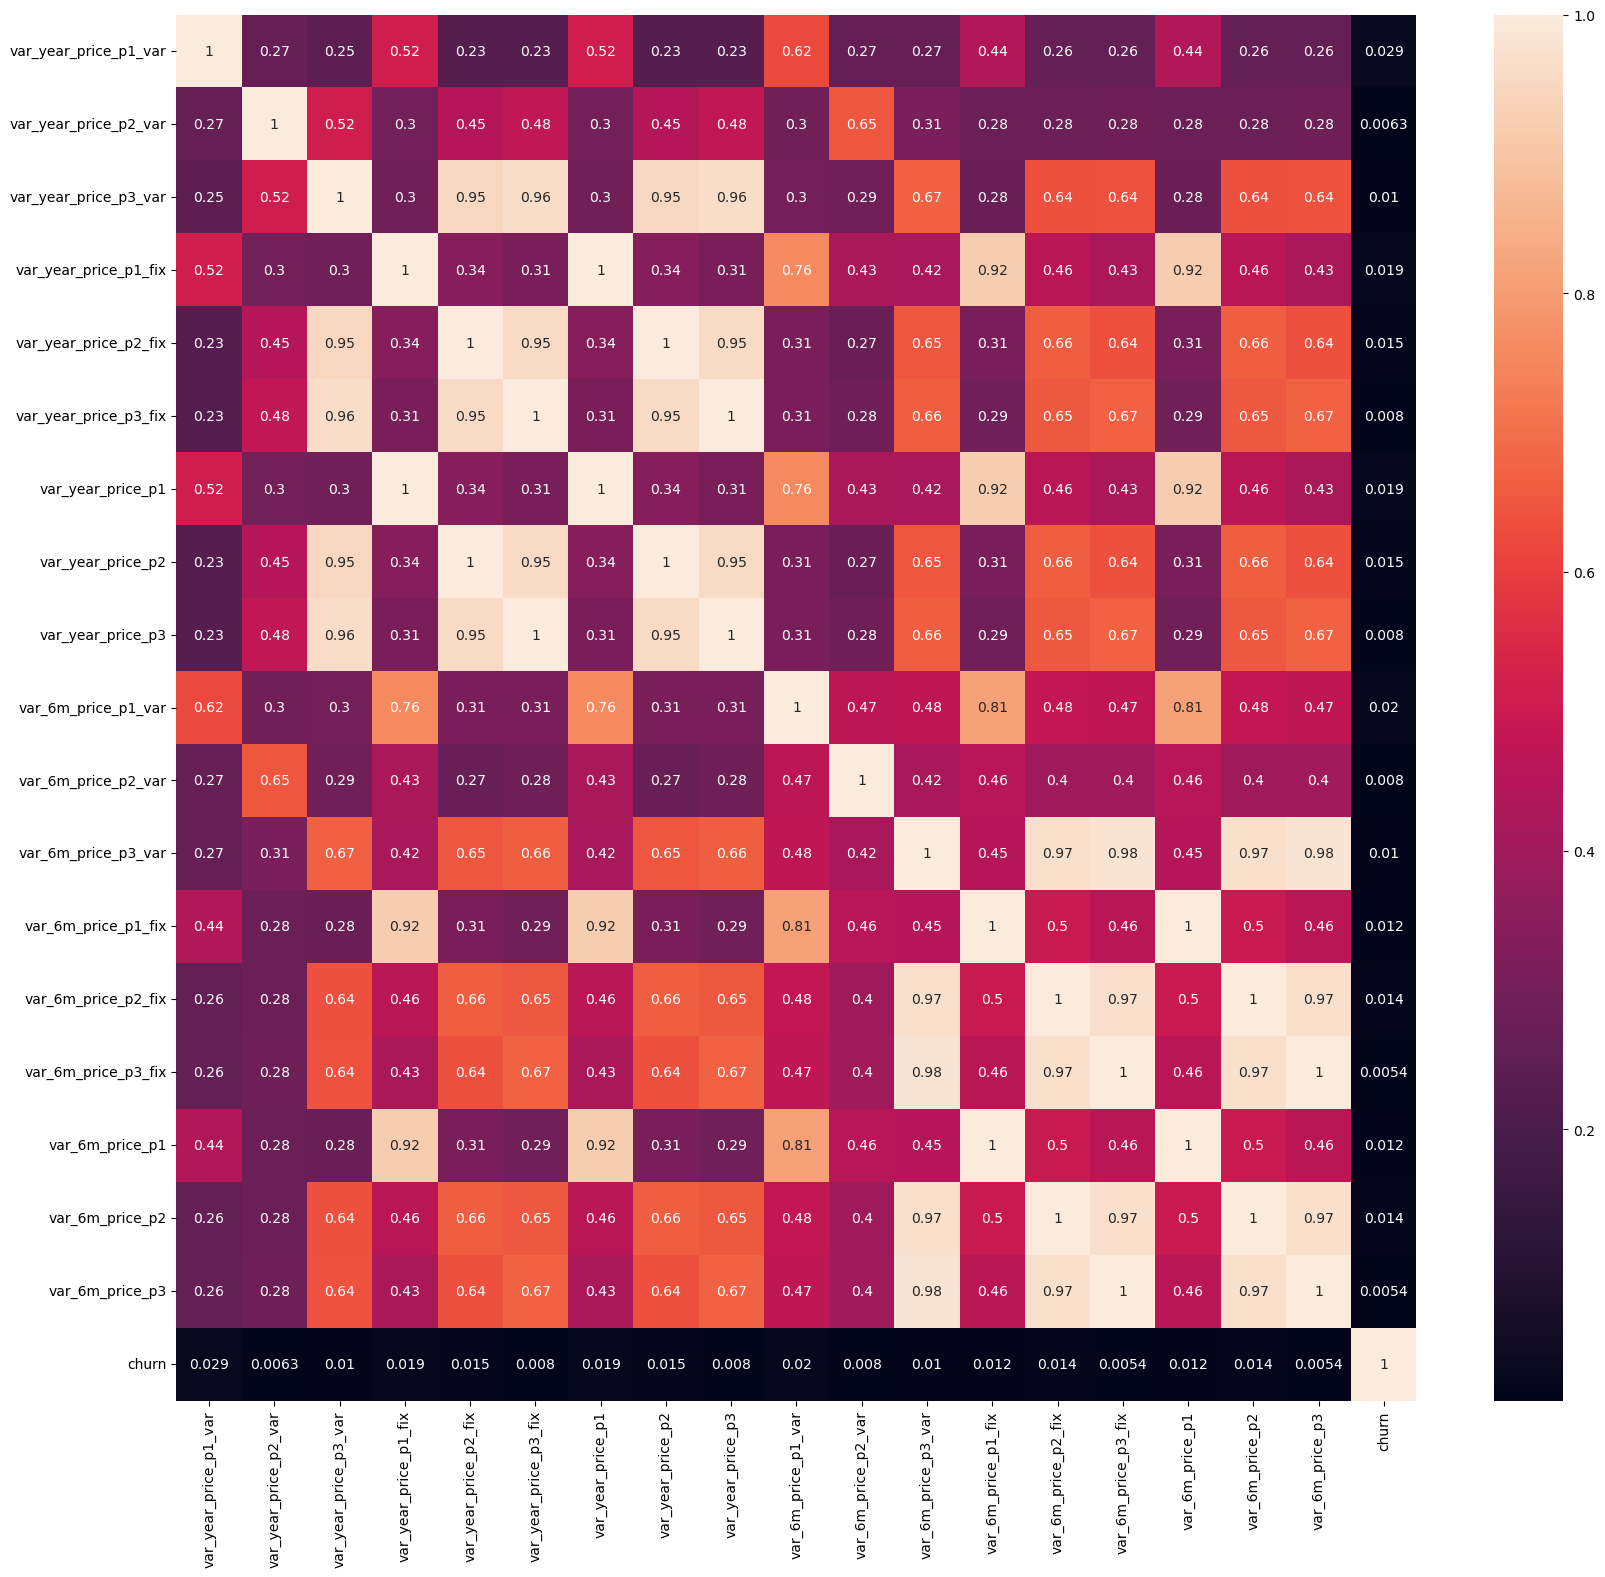

In [32]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [33]:
merged_data = pd.merge(client_df.drop(columns=['churn']), price_analysis,on='id')
merged_data.to_csv('clean_data_after_eda.csv')